In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")
include(pathtorepo * "dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, JLD
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
U0_hom = u0_hom[:];

In [4]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4; const α = 1.58; const ΔU0 = 0.305;

In [5]:
time = 2000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [6]:
index_dot = 13 # 25
I0_hom_dot = I0_hom[index_dot]
U0_hom_dot = U0_hom[index_dot]

println("I0: ", I0_hom[index_dot])
println("U0: ", U0_hom[index_dot])

I0: -1.7069071372342806
U0: 0.26504556977786675


In [7]:
I0 = I0_hom_dot; U0 = U0_hom_dot
#I0 = -1.7016; U0 = 0.265

p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [11.325905642223786, 0.6594706953104683, 0.4863175026548461]

ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.26504556977786675, 0.305, 0.3, -1.7069071372342806]
 time:          0.0
 state:         [11.325905642223786, 0.6594706953104683, 0.4863175026548461]


In [8]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

index_fp = 1
index_vec = 1

Jac = jacob_TM_(fp[index_fp], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, index_vec])*1e-4 + fp[index_fp]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.345331343993289
 0.7384889657322181
 0.4382958471685885

In [10]:
idx_fix = 1; fixed_value = 11
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-15, atol = 1e-20);

In [11]:
pmap_ = PoincareMap(ds, surface, rootkw = setting_root)

3-dimensional PoincareMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  TM
 hyperplane:    (1, 11)
 crossing time: 2.1871773989450705
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.26504556977786675, 0.305, 0.3, -1.7069071372342806]
 time:          0
 state:         [11.000000000000032, 0.7239075601084137, 0.4454967556471555]


In [13]:
tr, trange = trajectory(pmap_, 500)

(3-dimensional StateSpaceSet{Float64} with 501 points, 0:1:500)

In [ ]:
ts, tf = 1, 500
idx, idy = 2, 3

CairoMakie.activate!()
f = Figure(resolution = (700, 700))
ax = Axis(f[1, 1])


scatter!(tr[ts:tf, idx], tr[ts:tf, idy],
    markersize = 5.5, color = :deeppink)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], color = :blue, markersize = 12)
end

display(f)

In [60]:
prob_backward_time = ODEProblem(TM, shift, (0.0, -5000), p)
prob_forward_time = ODEProblem(TM, shift, (0.0, 5000), p)

ODEProblem with uType SVector{3, Float64} and tType Float64. In-place: false
timespan: (0.0, 5000.0)
u0: 3-element SVector{3, Float64} with indices SOneTo(3):
 8.345331343993289
 0.7384889657322181
 0.4382958471685885

In [61]:
sol_backward = solve(prob_backward_time, alg = Vern9(),  adaptive = true, abstol = 1e-14, reltol = 1e-14)
sol_forward = solve(prob_forward_time, alg = Vern9(),  adaptive = true, abstol = 1e-14, reltol = 1e-14);


┌ Warning: dt(-2.9279468024331845e-13) <= dtmin(9.094947017729282e-13) at t=-4.047702225432292. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\Alex\.julia\packages\SciMLBase\VdcHg\src\integrator_interface.jl:589


In [90]:
tst_back, ted_back = 1, 270
tst_for, ted_for = 1, 557
idx, idy, idz = 1, 2, 3
lb_size = 30; tck_size = 25;
#dis  = 60;

GLMakie.activate!()
f = Figure(resolution = (700, 700))
ax = LScene(f[1, 1], show_axis = true)
scale!(ax.scene, 1, 50, 50)


lines!(sol_backward[idx, tst_back:ted_back], sol_backward[idy, tst_back:ted_back], sol_backward[idz, tst_back:ted_back], linewidth = 1.5, color = :blue)
lines!(sol_forward[idx, tst_for:ted_for], sol_forward[idy, tst_for:ted_for], sol_forward[idz, tst_for:ted_for], linewidth = 1.5, color = :deeppink)


for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end



#ax = Axis(f[1, 1])
#lines!(sol[idx, ts:tf], sol[idy, ts:tf], linewidth = 1., color = :deeppink)
#for (i, ep) in enumerate(fp)
    #scatter!(ep[idx], ep[idy], color = :blue, markersize = 12)
#end

display(GLMakie.Screen(), f)

GLMakie.Screen(...)

###  СЧИТАЙ В ОБРАТНОМ ВРЕМЕНИ КОЛИЧЕСТВО СПАЙКОВ ПРИДУРОК

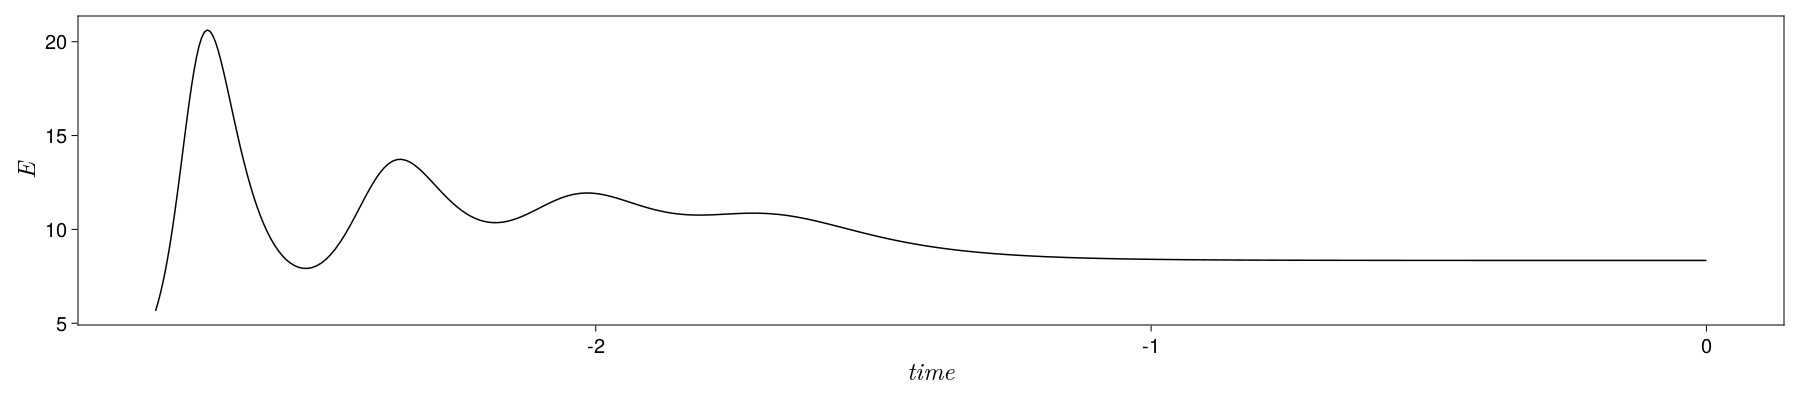

In [52]:
ts, tf = 1, 220  # idxs_glob_min[idxstart], idxs_glob_min[idxend]

lb_size_ts = 25
tck_size_ts = 20

idxstart, idxend = 1, 377
idxstartbt, idxendbt = 1, 23

CairoMakie.activate!()
f = Figure(resolution = (1800, 400))

axisE = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)

lines!(axisE, sol.t[ts:tf], sol[1, ts:tf], linewidth = 1.5, color = :black)

f

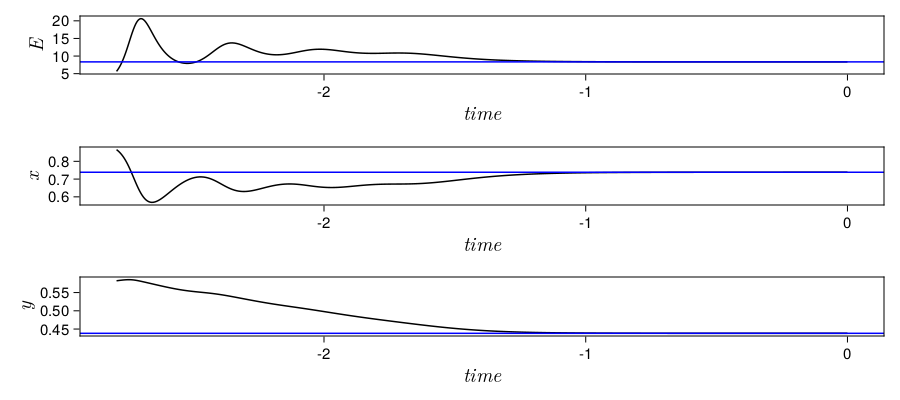

In [53]:
ts, tf = 1, 220
lb_size_ts = 20
tck_size_ts = 15
f = Figure(resolution = (900, 400))

axisE = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)
axisx = Axis(f[2, 1], xlabel = L"$time$", ylabel = L"$x$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)
axisy = Axis(f[3, 1], xlabel = L"$time$", ylabel = L"$y$",
            xlabelsize = lb_size_ts, ylabelsize = lb_size_ts,
            xticklabelsize = tck_size_ts, yticklabelsize = tck_size_ts,
            xgridvisible = false, ygridvisible = false)

lines!(axisE, sol.t[ts:tf], sol[1, ts:tf], linewidth = 1.5, color = :black)
hlines!(axisE, fp[1][1], color = :blue)

lines!(axisx, sol.t[ts:tf], sol[2, ts:tf], linewidth = 1.5, color = :black)
hlines!(axisx, fp[1][2], color = :blue)

lines!(axisy, sol.t[ts:tf], sol[3, ts:tf], linewidth = 1.5, color = :black)
hlines!(axisy, fp[1][3], color = :blue)

f